In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [100]:
#reading the data
diwali_sales = pd.read_csv('/Users/angeljoy/Downloads/diwalisales.csv', encoding = 'Unicode_escape')

In [155]:
#viewing the first 10 datas
diwali_sales.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,20191
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799


## Data Cleaning
#### Filtering out the coulumns with null value

In [102]:
diwali_sales.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [113]:
diwali_nan = diwali_sales[diwali_sales['Amount'].isnull()]
diwali_nan.head(15)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


#### Deleting the columns with empty values

In [103]:
diwali_sales.drop(['Status','unnamed1'], axis=1, inplace=True)

In [121]:
diwali_sales.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


#### Filling the null values of 'Amount' Column with the mean of Product_Category's purchase value

In [132]:
diwali_sales['Amount'] = diwali_sales.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

#### Here we could see that 12 NaN values of 'Amount' column are filled with mean

In [137]:
diwali_sales.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [152]:
diwali_sales['Amount'] = diwali_sales['Amount'].astype('int')

In [252]:
diwali_sales['Amount'].dtypes

dtype('int64')

## Exploratory Data Analysis

### Which Product is sold most (based on category)?
#### Product 

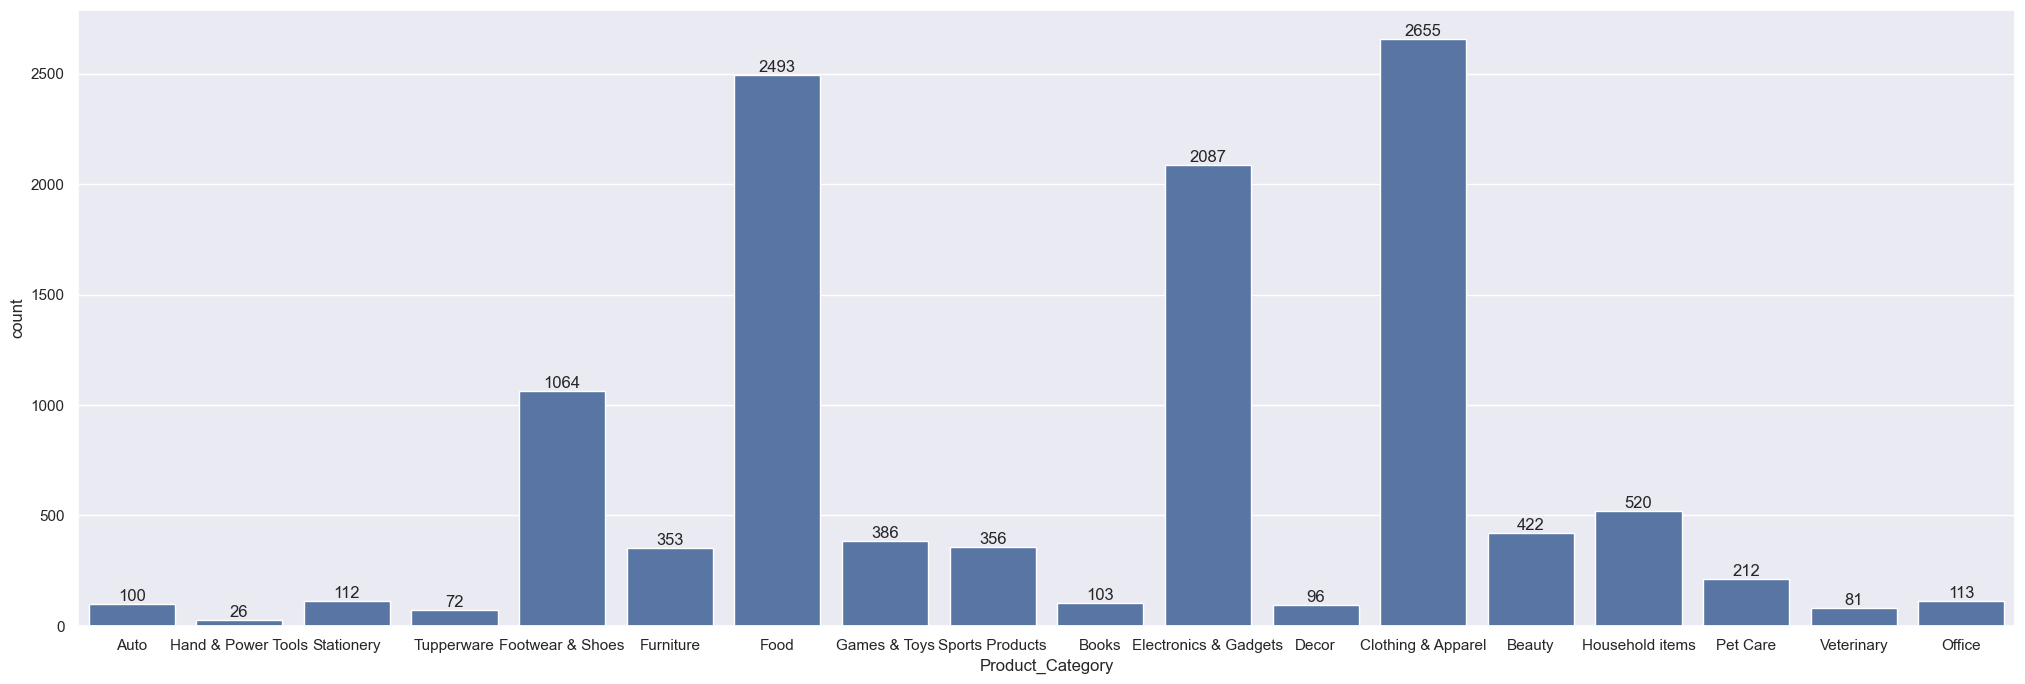

In [188]:
sns.set(rc={'figure.figsize':(25,8)})
pa = sns.countplot(x = 'Product_Category', data = diwali_sales)
for bars in pa.containers:
    pa.bar_label(bars)

##### Here, from the above graph, it is clear that Clothing and Apparel segment are most sold item followed by Food and Electronics & Gadget.

In [205]:
order_grp = diwali_sales.groupby('Product_Category')['Orders'].sum().reset_index()
print(order_grp)

         Product_Category  Orders
0                    Auto     246
1                  Beauty    1086
2                   Books     245
3      Clothing & Apparel    6634
4                   Decor     235
5   Electronics & Gadgets    5226
6                    Food    6120
7        Footwear & Shoes    2654
8               Furniture     890
9            Games & Toys     940
10     Hand & Power Tools      80
11        Household items    1331
12                 Office     261
13               Pet Care     536
14        Sports Products     870
15             Stationery     281
16             Tupperware     166
17             Veterinary     206


#### Product vs Orders

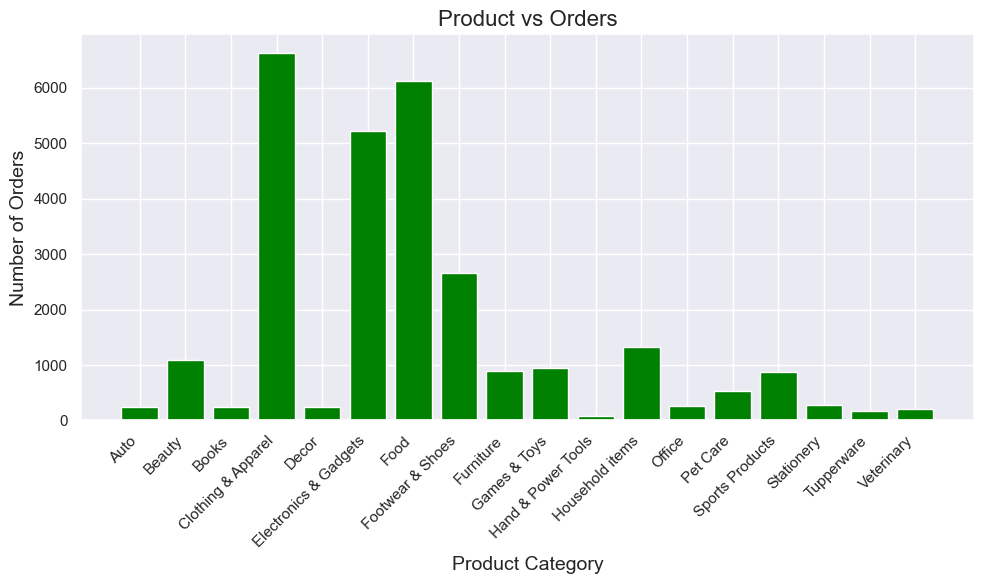

In [207]:
plt.figure(figsize=(10, 6)) 
plt.bar(order_grp['Product_Category'], order_grp['Orders'], color='green')  

plt.title('Product vs Orders', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Who is actively purchasing (based on gender)?
#### Female vs Male

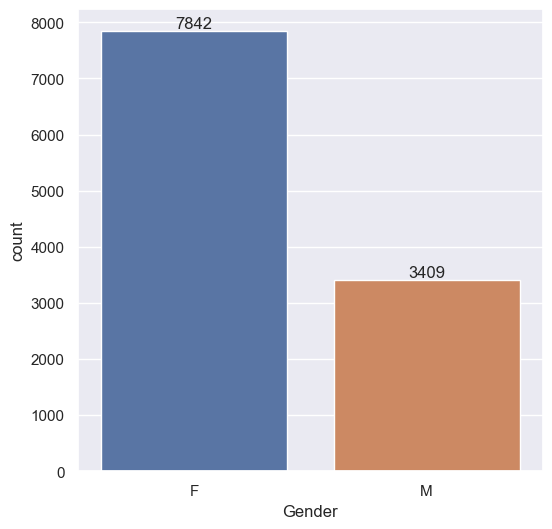

In [247]:
sns.set(rc={'figure.figsize':(6,6)})
g = sns.countplot(x='Gender',data=diwali_sales, hue='Gender')
for bars in g.containers:
   g.bar_label(bars)

#### From the above, Female audience are buying products compared to Male



### Which age group is pottential buyer?
#### Age group vs Product category

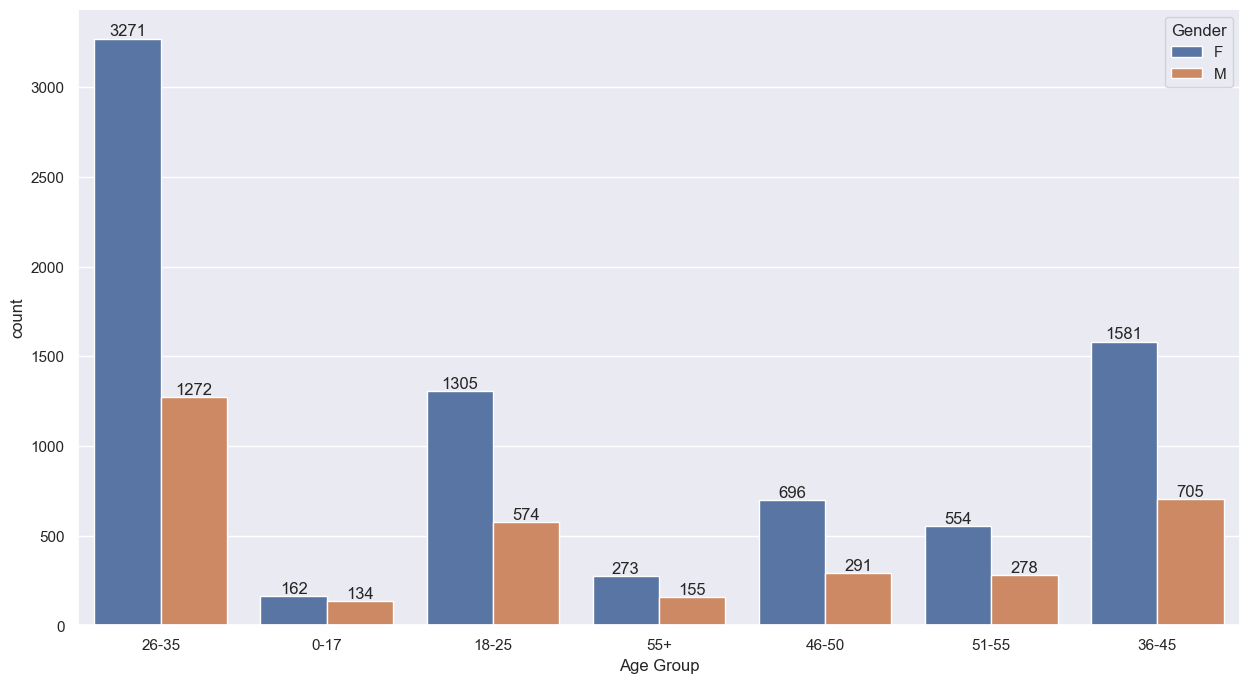

In [250]:
sns.set(rc={'figure.figsize':(15,8)})
ag = sns.countplot(data=diwali_sales, x = 'Age Group', hue ='Gender')
for bars in ag.containers:
    ag.bar_label(bars)

#### Target Audience are from the age group 26-35, female